In [956]:
# !pip install kaggle
# ! mkdir ~/.kaggle

# import json
# kaggle_token = {"username":"datastorm120","key":"8ff6645b2258b372547db6ef8b635c6c"}
# with open("kaggle.json", "w") as f:
#   token_json = json.dumps(kaggle_token)
#   f.write(token_json)

# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle competitions download -c data-storm-4
# ! unzip data-storm-4.zip 

In [957]:
import pandas as pd
import numpy as np

store_info_data = pd.read_csv('Store-info.csv')
historical_data = pd.read_csv('Historical-transaction-data.csv')
testing_data = pd.read_csv('Testing-data.csv')

store_info_data.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [958]:
merged_df = pd.merge(historical_data, store_info_data, on='shop_id', how='left')

merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,678,Moderate
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,668,Moderate
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,678,Moderate
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,678,Moderate
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,668,Moderate


In [959]:
# # create a dictionary mapping item prices to their most common item descriptions
# price_to_mode = merged_df.groupby('item_description')['item_price'].apply(lambda x: x.mode()[0]).to_dict()
# # Loop through each row in merged_df
# for index, row in merged_df.iterrows():
#     # Check if item_description is null
#     if pd.isnull(row['item_description']):
#         # Find the item name in price_to_mode that has the same price
#         item_name = [key for key, value in price_to_mode.items() if value == row['item_price']]
#         # If there is a matching item name, fill the null value in item_description
#         if item_name:
#             merged_df.at[index, 'item_description'] = item_name[0]

# null_count = merged_df['item_description'].isnull().sum()
# print("Number of null values in item_description feature:", null_count)
# merged_df['item_price'] = merged_df.apply(lambda row: price_to_mode[row['item_description']] if pd.isnull(row['item_price']) else row['item_price'], axis=1)

# null_count = merged_df['item_price'].isnull().sum()
# print("Number of null values in item_price feature:", null_count)

In [960]:
merged_df.dropna(subset=['item_price'], inplace=True)

null_count = merged_df['item_price'].isnull().sum()
print("Number of null values in 'item_price' feature:", null_count)

Number of null values in 'item_price' feature: 0


In [961]:
merged_df.dropna(subset=['item_description'], inplace=True)

null_count = merged_df['item_description'].isnull().sum()
print("Number of null values in item_description feature:", null_count)

Number of null values in item_description feature: 0


In [962]:
merged_df.dropna(subset=['invoice_id'], inplace=True)

null_count = merged_df['invoice_id'].isnull().sum()
print("Number of null values in invoice_id feature:", null_count)

Number of null values in invoice_id feature: 0


In [963]:
# Select columns with numeric data types
numeric_cols = merged_df.select_dtypes(include=[int, float])

# Drop rows with negative values in any numeric column
merged_df = merged_df.drop(numeric_cols[(numeric_cols < 0).any(1)].index)

<ipython-input-963-e7cf8abd89dd>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  merged_df = merged_df.drop(numeric_cols[(numeric_cols < 0).any(1)].index)


In [964]:
from sklearn.preprocessing import LabelEncoder

# instantiate a LabelEncoder object
le = LabelEncoder()

# label encode the item_description, customer_id, and shop_profile columns
merged_df['item_description'] = le.fit_transform(merged_df['item_description'])
merged_df['customer_id'] = le.fit_transform(merged_df['customer_id'])

# replace the values in the shop_profile column with 1 for High, 2 for Moderate, and 3 for Low
merged_df['shop_profile'] = merged_df['shop_profile'].replace({'Low':3, 'Moderate':2, 'High':1})

merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,27,2021-12-11T00:00:00.000Z,147.0,57272,SHOP008,220,2,678,2.0
1,14,2021-10-17T00:00:00.000Z,371.0,91334,SHOP112,220,2,668,2.0
2,35,2021-12-13T00:00:00.000Z,484.0,158179,SHOP008,160,2,678,2.0
3,4,2021-12-13T00:00:00.000Z,484.0,158179,SHOP008,150,2,678,2.0
4,34,2021-10-23T00:00:00.000Z,1310.0,38862,SHOP112,210,5,668,2.0


In [965]:
# Parse the transaction_date column as a datetime object
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

# Extract relevant features from the transaction_date column
merged_df['year'] = merged_df['transaction_date'].dt.year
merged_df['month'] = merged_df['transaction_date'].dt.month
merged_df['day_of_week'] = merged_df['transaction_date'].dt.dayofweek
merged_df['hour'] = merged_df['transaction_date'].dt.hour

merged_df = merged_df.drop('transaction_date', axis=1)

merged_df.head()

,item_description,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,year,month,day_of_week,hour
0,27,147.0,57272,SHOP008,220,2,678,2.0,2021,12,5,0
1,14,371.0,91334,SHOP112,220,2,668,2.0,2021,10,6,0
2,35,484.0,158179,SHOP008,160,2,678,2.0,2021,12,0,0
3,4,484.0,158179,SHOP008,150,2,678,2.0,2021,12,0,0
4,34,1310.0,38862,SHOP112,210,5,668,2.0,2021,10,5,0


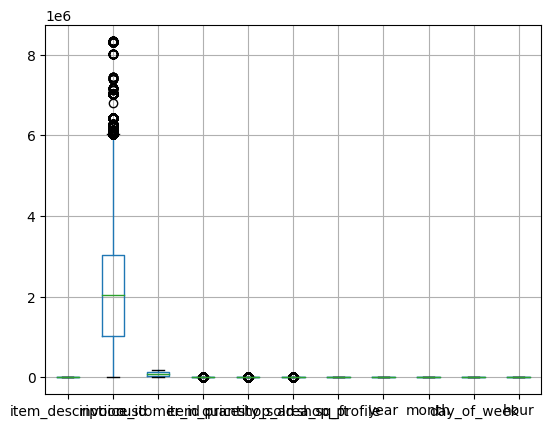

In [966]:
import matplotlib.pyplot as plt

# Create a list of columns to plot
columns_to_plot = ['item_description', 'invoice_id', 'customer_id', 'item_price', 'quantity_sold', 'shop_area_sq_ft', 'shop_profile', 'year', 'month', 'day_of_week', 'hour']

# Create a boxplot for each column
merged_df[columns_to_plot].boxplot()
plt.show()

In [967]:
store_info_data.tail()

,shop_id,shop_area_sq_ft,shop_profile
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN
123,SHOP070,676,NaN


In [968]:
# Group merged_df by shop_id
grouped = merged_df.groupby('shop_id')

# Calculate total sales for each shop
total_sales = grouped['item_price'].sum()

# Calculate average transaction value for each shop
avg_transaction_value = grouped['item_price'].mean()

# Calculate number of unique customers for each shop
num_unique_customers = grouped['customer_id'].nunique()

# Calculate most popular item for each shop
most_popular_item = grouped['item_description'].agg(lambda x:x.value_counts().index[0])

# Calculate total quantity sold for each shop
total_quantity_sold = grouped['quantity_sold'].sum()

# Calculate average item price for each shop
avg_item_price = grouped['item_price'].mean()

# Calculate number of unique items for each shop
num_unique_items = grouped['item_description'].nunique()

# Calculate most expensive item for each shop
most_expensive_item = grouped.apply(lambda x: x.loc[x['item_price'].idxmax(), "item_description"])

# Merge calculated features into store_info_data DataFrame
store_info_data = store_info_data.merge(total_sales.rename('total_sales'), how='left', on='shop_id')
store_info_data = store_info_data.merge(avg_transaction_value.rename('avg_transaction_value'), how='left', on='shop_id')
store_info_data = store_info_data.merge(num_unique_customers.rename('num_unique_customers'), how='left', on='shop_id')
store_info_data = store_info_data.merge(most_popular_item.rename('most_popular_item'), how='left', on='shop_id')
store_info_data = store_info_data.merge(total_quantity_sold.rename('total_quantity_sold'), how='left', on='shop_id')
store_info_data = store_info_data.merge(avg_item_price.rename('avg_item_price'), how='left', on='shop_id')
store_info_data = store_info_data.merge(num_unique_items.rename('num_unique_items'), how='left', on='shop_id')
store_info_data = store_info_data.merge(most_expensive_item.rename('most_expensive_item'), how='left', on='shop_id')

# Calculate sales per square foot for each shop
store_info_data['sales_per_sq_ft'] = store_info_data['total_sales'] / store_info_data['shop_area_sq_ft']

# Calculate average transaction value per square foot for each shop
store_info_data['avg_transaction_value_per_sq_ft'] = store_info_data['avg_transaction_value'] / store_info_data['shop_area_sq_ft']

# Calculate average item price per square foot for each shop
store_info_data['avg_item_price_per_sq_ft'] = store_info_data['avg_item_price'] / store_info_data['shop_area_sq_ft']

# Calculate the total number of transactions per day for each shop
transactions_per_day = merged_df.groupby(['shop_id', 'year', 'month', 'day_of_week'])['invoice_id'].nunique().reset_index(name='transactions')

# Calculate the average number of transactions per day for each shop
avg_transactions_per_day = transactions_per_day.groupby('shop_id')['transactions'].mean().reset_index(name='avg_transactions_per_day')

# Merge the result with the store_info_data dataframe
store_info_data = store_info_data.merge(avg_transactions_per_day, on='shop_id', how='left')

# First, calculate the total spending per customer for each shop
customer_spendings = merged_df.groupby(['shop_id', 'customer_id'])['item_price'].sum().reset_index(name='total_spending')

# Then, calculate the average spending per customer for each shop
avg_customer_spendings = customer_spendings.groupby('shop_id')['total_spending'].mean().reset_index(name='avg_customer_spending')

# Finally, merge the result with store_info_data
store_info_data = pd.merge(store_info_data, avg_customer_spendings, on='shop_id', how='left')

num_customers = merged_df.groupby('shop_id')['customer_id'].nunique().reset_index(name='num_customers')

# Then, calculate the average number of customers per square feet for each shop
num_customers['avg_customers_per_sq_ft'] = num_customers['num_customers'] / store_info_data['shop_area_sq_ft']

# Finally, merge the result with store_info_data
store_info_data = pd.merge(store_info_data, num_customers[['shop_id', 'avg_customers_per_sq_ft']], on='shop_id', how='left')

grouped_data = historical_data.groupby(['shop_id', 'item_description', 'item_price'])

# define a custom function to calculate revenue for each group
def calculate_revenue(group):
    return (group['quantity_sold'] * group['item_price']).sum()

# apply the custom function to calculate revenue for each group
revenue_data = grouped_data.apply(calculate_revenue).reset_index(name='revenue')

# calculate the average revenue for each item by shop
average_revenue = revenue_data.groupby(['shop_id', 'item_description'])['revenue'].mean()

average_revenue = average_revenue.reset_index().rename(columns={'revenue': 'average_revenue'})


def add_average_revenue(average_revenue, store_info_data):
    # reshape the average_revenue DataFrame using pivot
    average_revenue_pivot = average_revenue.pivot(index='shop_id', columns='item_description', values='average_revenue')

    # join the reshaped average_revenue DataFrame with the store_info_data DataFrame
    result = store_info_data.join(average_revenue_pivot, on='shop_id')

    # replace any missing values with 0
    result.fillna(0, inplace=True)

    return result

# example usage
# assuming the average revenue data is stored in a DataFrame called average_revenue
# and the store information data is stored in a DataFrame called store_info_data
store_info_data = add_average_revenue(average_revenue, store_info_data)



# Display final store_info_data DataFrame
store_info_data.tail()

,shop_id,shop_area_sq_ft,shop_profile,total_sales,avg_transaction_value,num_unique_customers,most_popular_item,total_quantity_sold,avg_item_price,num_unique_items,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
119,SHOP087,527,0,421890,224.648562,1014,14,3423,224.648562,35,...,17746.666667,5555.000000,1725.0,1650.000000,4950.000000,2782.500000,10026.666667,1260.000000,13972.500000,3253.333333
120,SHOP050,411,0,886540,240.189651,1696,14,7055,240.189651,31,...,45430.000000,10926.666667,0.0,2633.333333,7626.666667,5903.333333,13141.428571,3040.000000,14125.714286,6075.000000
121,SHOP061,699,0,673050,228.850731,1657,14,5639,228.850731,35,...,29333.333333,5225.000000,1500.0,1600.000000,11675.714286,4060.000000,13343.000000,2028.333333,9218.571429,9045.000000
122,SHOP056,597,0,1087380,209.474090,2638,14,9583,209.474090,35,...,36828.000000,14960.000000,1950.0,4750.000000,6222.857143,8680.000000,7386.666667,6685.000000,8278.750000,9990.000000
123,SHOP070,676,0,566205,219.629558,1322,14,4570,219.629558,35,...,30653.333333,5573.333333,1350.0,2000.000000,5148.000000,4077.500000,6518.571429,15064.000000,4585.714286,10170.000000


In [969]:
store_info_data['shop_profile'] = store_info_data['shop_profile'].replace({0: 'High', 1: 'Moderate', 2: 'Low'})
 
store_info_data.head()

,shop_id,shop_area_sq_ft,shop_profile,total_sales,avg_transaction_value,num_unique_customers,most_popular_item,total_quantity_sold,avg_item_price,num_unique_items,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP047,528,Moderate,312405,204.587426,841,14,2840,204.587426,35,...,9075.000000,5060.000000,4150.0,3166.666667,5866.666667,2240.000000,6272.857143,1355.555556,4910.000000,5670.0
1,SHOP009,676,High,782070,196.056656,2210,14,6980,196.056656,35,...,34173.333333,16133.333333,1500.0,10900.000000,7223.333333,6813.333333,5291.428571,2660.000000,4611.428571,7830.0
2,SHOP083,676,Low,687670,209.719427,1719,14,5852,209.719427,35,...,29216.000000,9790.000000,2475.0,2500.000000,7122.500000,4742.500000,9266.250000,3220.000000,5294.285714,6750.0
3,SHOP117,676,Low,838230,223.528000,1898,14,7223,223.528000,35,...,41726.666667,7993.333333,3700.0,3075.000000,11785.714286,11410.000000,18262.000000,2842.000000,16161.111111,6300.0
4,SHOP042,676,Low,573035,194.843591,1661,14,5048,194.843591,35,...,26895.000000,7333.333333,1575.0,2600.000000,7003.333333,5477.500000,10353.333333,3750.000000,8804.000000,7290.0


In [970]:
# import seaborn as sns

# # create a new dataframe without 'shop_profile' and 'store_id'
# cols = [col for col in store_info_data.columns if col not in ['shop_profile', 'store_id']]
# df = store_info_data[cols].select_dtypes(include=['float64', 'int64'])

# # create box plots for each column
# for col in df.columns:
#     sns.boxplot(x=df[col])


In [971]:
# Define a function to identify outliers using the IQR method
def find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return (data < lower_bound) | (data > upper_bound)

# Get a list of columns to process
columns_to_process = [col for col in store_info_data.columns if col not in ['shop_profile', 'shop_id']]

# Replace outliers with the median value for each column
for col in columns_to_process:
    # Find the outliers in the column
    outliers = find_outliers(store_info_data[col])
    
    # Calculate the median value of the column
    median_value = store_info_data[col].median()
    
    # Replace the outliers with the median value
    store_info_data.loc[outliers, col] = median_value

In [972]:
store_info_data.tail()

,shop_id,shop_area_sq_ft,shop_profile,total_sales,avg_transaction_value,num_unique_customers,most_popular_item,total_quantity_sold,avg_item_price,num_unique_items,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
119,SHOP087,527,High,421890.0,224.648562,1014,14,3423.0,224.648562,35,...,17746.666667,5555.000000,1725.0,1650.000000,4950.000000,2782.500000,10026.666667,1260.000000,13972.500000,3253.333333
120,SHOP050,411,High,886540.0,240.189651,1696,14,7055.0,240.189651,35,...,45430.000000,10926.666667,0.0,2633.333333,7626.666667,5903.333333,13141.428571,3040.000000,14125.714286,6075.000000
121,SHOP061,699,High,673050.0,228.850731,1657,14,5639.0,228.850731,35,...,29333.333333,5225.000000,1500.0,1600.000000,11675.714286,4060.000000,13343.000000,2028.333333,9218.571429,9045.000000
122,SHOP056,597,High,1087380.0,209.474090,2638,14,9583.0,209.474090,35,...,36828.000000,14960.000000,1950.0,4750.000000,6222.857143,8680.000000,7386.666667,6685.000000,8278.750000,9990.000000
123,SHOP070,676,High,566205.0,219.629558,1322,14,4570.0,219.629558,35,...,30653.333333,5573.333333,1350.0,2000.000000,5148.000000,4077.500000,6518.571429,3395.000000,4585.714286,10170.000000


In [973]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to scale
cols_to_scale = store_info_data.select_dtypes(include=['float64', 'int64']).columns

# Fit the scaler to the selected columns and transform them
store_info_data[cols_to_scale] = scaler.fit_transform(store_info_data[cols_to_scale])

In [974]:
store_info_data.tail()

,shop_id,shop_area_sq_ft,shop_profile,total_sales,avg_transaction_value,num_unique_customers,most_popular_item,total_quantity_sold,avg_item_price,num_unique_items,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
119,SHOP087,0.309979,High,0.119789,0.673447,0.111744,0.0,0.069845,0.673447,0.0,...,0.291461,0.227528,0.370968,0.247706,0.268116,0.106305,0.415092,0.109453,0.479109,0.045538
120,SHOP050,0.063694,High,0.628170,0.890529,0.410605,0.0,0.504972,0.890529,0.0,...,0.789318,0.501873,0.000000,0.428135,0.444444,0.269266,0.556859,0.362473,0.485632,0.326907
121,SHOP061,0.675159,High,0.394587,0.732144,0.393514,0.0,0.335330,0.732144,0.0,...,0.499835,0.210674,0.322581,0.238532,0.711180,0.173012,0.566033,0.218669,0.276741,0.623068
122,SHOP056,0.458599,High,0.847912,0.461487,0.823401,0.0,0.807835,0.461487,0.0,...,0.634619,0.707865,0.419355,0.816514,0.351967,0.414255,0.294934,0.880597,0.236735,0.717301
123,SHOP070,0.626327,High,0.277687,0.603341,0.246713,0.0,0.207260,0.603341,0.0,...,0.523574,0.228464,0.290323,0.311927,0.281159,0.173926,0.255423,0.412935,0.079527,0.735250


In [975]:
# Define the columns to drop
columns_to_drop = ['avg_transaction_value', 'most_popular_item', 'total_quantity_sold', 'avg_item_price', 'num_unique_items', 'most_expensive_item','total_sales','CHOCOLATE MILK 180ML','LIME CRUSH JUICE 1L']

# Drop the specified columns from the store_info_data dataframe
store_info_data = store_info_data.drop(columns=columns_to_drop)

In [976]:
# train = store_info_data[store_info_data['shop_profile'].notnull()]
train = store_info_data.iloc[:-24]
print(len(train))

100


In [977]:
train.head()

,shop_id,shop_area_sq_ft,shop_profile,num_unique_customers,sales_per_sq_ft,avg_transaction_value_per_sq_ft,avg_item_price_per_sq_ft,avg_transactions_per_day,avg_customer_spending,avg_customers_per_sq_ft,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP047,0.312102,Moderate,0.035933,0.143284,0.609086,0.609086,0.010313,0.370997,0.152179,...,0.135509,0.202247,0.892473,0.525994,0.328502,0.077977,0.244239,0.123036,0.093332,0.286522
1,SHOP009,0.626327,High,0.635846,0.449443,0.293849,0.293849,0.608125,0.285867,0.531971,...,0.586878,0.767790,0.322581,0.498471,0.417874,0.316783,0.199570,0.308458,0.080622,0.501911
2,SHOP083,0.626327,Low,0.420684,0.373804,0.359228,0.359228,0.417187,0.509273,0.441359,...,0.497725,0.443820,0.532258,0.403670,0.411232,0.208651,0.380482,0.388060,0.109690,0.394216
3,SHOP117,0.626327,Low,0.499124,0.494442,0.425305,0.425305,0.564687,0.710587,0.495766,...,0.722717,0.352060,0.795699,0.509174,0.718427,0.556808,0.789919,0.334328,0.572276,0.349344
4,SHOP042,0.626327,Low,0.395267,0.281952,0.288044,0.288044,0.348437,0.242873,0.736453,...,0.455984,0.318352,0.338710,0.422018,0.403382,0.247030,0.429960,0.463397,0.259094,0.448064


In [978]:
# test = store_info_data[store_info_data['shop_profile'].isnull()]
test = store_info_data.iloc[100:]
print(len(test))

24


In [979]:
store_info_data.to_csv('updated_store_info_data.csv', index=False)

In [986]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# # Split data into predictors and target variable
# X = final_df.drop(['shop_profile', 'shop_id'], axis=1)
# y = final_df['shop_profile']


# # Select the top 5 features using chi2 scoring function
# k_best = SelectKBest(score_func=chi2, k=3)
# X = k_best.fit_transform(X, y)

# random_state = np.random.randint(1, 1000)
# # random_state = 401
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


# Split data into predictors and target variable
X = train.drop(['shop_profile', 'shop_id'], axis=1)
y = train['shop_profile']

# Select the top 3 features using mutual information scoring function
# k_best = SelectKBest(score_func=mutual_info_classif, k=3)
# X = k_best.fit_transform(X, y)
# shop_area_sq_ft,shop_profile,total_sales,avg_transaction_value,num_unique_customers,most_popular_item,total_quantity_sold,avg_item_price,num_unique_items,most_expensive_item,sales_per_sq_ft,avg_transaction_value_per_sq_ft,avg_item_price_per_sq_ft,avg_transactions_per_day,avg_customers_per_sq_ft
# f = ['total_sales','avg_transaction_value','num_unique_customers','most_popular_item','total_quantity_sold','avg_item_price','num_unique_items','most_expensive_item','sales_per_sq_ft','avg_transaction_value_per_sq_ft','avg_item_price_per_sq_ft','avg_transactions_per_day','avg_customers_per_sq_ft']
# X = X[f]
random_state = np.random.randint(1, 1000)
# random_state = 55
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train = pd.DataFrame(X_train)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = X_train.iloc[:, 0]
# y = X_train.iloc[:, 1]
# z = X_train.iloc[:, 2]

# ax.scatter(x, y, z)

# ax.set_xlabel(X_train.columns[0])
# ax.set_ylabel(X_train.columns[1])
# ax.set_zlabel(X_train.columns[2])

# plt.show()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Create an instance of the logistic regression classifier
# clf = LogisticRegression(C=500,max_iter=100000)
# clf = SVC(kernel='rbf', C=20)
clf = RandomForestClassifier(n_estimators=1000, max_depth=1000, random_state=random_state)

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')


# Fit the classifier to the training data
clf.fit(X, y)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(random_state)

# Make predictions on the test data
y_pred2 = clf.predict(X_train)

# Calculate the accuracy and F1 score
accuracy2 = accuracy_score(y_train, y_pred2)
f12 = f1_score(y_train, y_pred2, average='weighted')

print(f'Accuracy: {accuracy2:.2f}')
print(f'F1 Score: {f12:.2f}')

print(f'Cross-validation scores: {scores}')

# calculate the average cross-validation score
average_score = scores.mean()
print(f'Average cross-validation score: {average_score}')

print(random_state)
# 55 875 73 9
# import seaborn as sns

# # Create a dictionary to map store_profile values to colors
# color_map = {'High': 'red', 'Moderate': 'blue', 'Low': 'green'}

# # Create a new column in the store_info_data dataframe that maps the store_profile values to colors
# store_info_data['color'] = store_info_data['shop_profile'].map(color_map)

# # Create the scatter plot using seaborn
# sns.scatterplot(data=store_info_data, x=f[0], y=f[1], hue='color')
# store_info_data = store_info_data.drop('color', axis=1)

Accuracy: 1.00
F1 Score: 1.00
849
Accuracy: 1.00
F1 Score: 1.00
Cross-validation scores: [0.69857398 0.69363636 0.45363636 0.69606643 0.46075175]
Average cross-validation score: 0.6005329768270944
849


In [981]:
test.head()

,shop_id,shop_area_sq_ft,shop_profile,num_unique_customers,sales_per_sq_ft,avg_transaction_value_per_sq_ft,avg_item_price_per_sq_ft,avg_transactions_per_day,avg_customer_spending,avg_customers_per_sq_ft,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
100,SHOP046,0.348195,High,0.390447,0.542726,0.688019,0.688019,0.459687,0.697891,0.420386,...,0.424662,0.469101,0.580645,0.706422,0.404589,0.331752,0.527172,0.241294,0.880785,0.124979
101,SHOP024,0.626327,High,0.336109,0.250310,0.316220,0.316220,0.309687,0.265340,0.342214,...,0.292779,0.554307,0.419355,0.651376,0.287440,0.115991,0.369217,0.286070,0.351155,0.259598
102,SHOP023,0.501062,High,0.546889,0.549107,0.542427,0.542427,0.534375,0.568250,0.449739,...,0.451039,0.662921,1.000000,0.434251,0.228986,0.249772,0.631756,0.322672,0.264268,0.353831
103,SHOP097,0.501062,High,0.351884,0.988375,0.427764,0.427764,0.356563,0.640087,0.402256,...,0.360040,0.387640,0.000000,0.422018,0.533816,0.553884,0.564304,0.379768,0.346875,0.690377
104,SHOP044,0.709130,High,0.298861,0.196356,0.270732,0.270732,0.249062,0.229334,0.301646,...,0.391691,0.101124,0.376344,0.330275,0.755072,0.336278,0.511540,0.258706,0.381734,0.080106


In [982]:
X_test = test.drop(['shop_profile', 'shop_id'], axis=1)
# X_test = k_best.transform(X_test)

# Make predictions on the train data
y_pred = clf.predict(X_test)

# Create a new dataframe containing the shop_id column and the predictions
results = pd.DataFrame({'shop_id': test['shop_id'], 'shop_profile': y_pred})

print(len(results))
results.head()

24


,shop_id,shop_profile
100,SHOP046,Moderate
101,SHOP024,Low
102,SHOP023,Low
103,SHOP097,Moderate
104,SHOP044,Moderate


In [983]:
results.to_csv('updated_results.csv', index=False)